# Нейронные сети

1.	Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv. Насколько отличается результат обучения и почему? Сколько потребовалось эпох для обучения? Попробуйте различные функции активации и оптимизаторы. 

建立一个由一个神经元组成的神经网络，并在数据集nn_0.csv和nn_1.csv上训练它。训练结果有什么不同，为什么？训练需要多少个纪元？尝试不同的激活函数和优化器。


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models, layers


data = pd.read_csv(filepath_or_buffer='./nn_0.csv')
# plt.figure(figsize=(20, 10), dpi=50)
plt.scatter(data[data['class'] == -1]['X1'], data[data['class'] == -1]['X2'], label='class == -1')
plt.scatter(data[data['class'] == +1]['X1'], data[data['class'] == +1]['X2'], label='class == +1')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Points in nn_0.csv')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], random_state=90102)
transfer = LabelBinarizer()
y_train = transfer.fit_transform(y=y_train)
y_test = transfer.transform(y=y_test)

# 激活函数和优化器
# Функции активации и оптимизаторы
activation_list = ['sigmoid', 'relu', 'softmax']
optimizer_list = ['adam', 'adamax', 'RMSprop', 'SGD']
for activation in activation_list:
    for optimizer in optimizer_list:
        visible = layers.Input(shape=(2,))
        hidden = layers.Dense(1, activation=activation)(visible)
        model = models.Model(inputs=visible, outputs=hidden)
        model.compile(
            optimizer = optimizer,
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
        )

        model.fit(x_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'activation: {activation} | optimizer: {optimizer} | accuracy: {test_acc}')

2.  Модифицируйте нейронную сеть из пункта 1, чтобы достичь
 минимальной ошибки на датасете nn_1.csv. Почему были выбраны именно такие гиперпараметы?

修改步骤1中的神经网络，使其在数据集nn_1.csv上达到最小误差。为什么选择这些超参数？

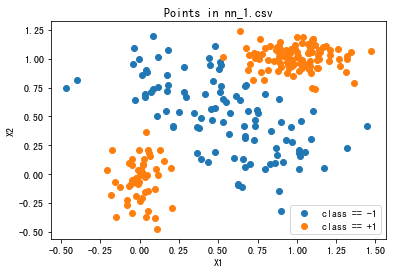

Epoch 1/12
19/75 [======>.......................] - ETA: 0s - loss: 0.8991 - accuracy: 0.5238

2022-05-10 22:56:20.584277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 8ms/step - loss: 0.7917 - accuracy: 0.5317 - val_loss: 0.6280 - val_accuracy: 0.5263
Epoch 2/12
19/75 [======>.......................] - ETA: 0s - loss: 0.6195 - accuracy: 0.6341  

2022-05-10 22:56:21.183335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 0s 7ms/step - loss: 0.6070 - accuracy: 0.6424 - val_loss: 0.5517 - val_accuracy: 0.5526
Epoch 3/12
75/75 [==============================] - 1s 8ms/step - loss: 0.5488 - accuracy: 0.6449 - val_loss: 0.4919 - val_accuracy: 0.6316
Epoch 4/12
75/75 [==============================] - 1s 8ms/step - loss: 0.5346 - accuracy: 0.6837 - val_loss: 0.4960 - val_accuracy: 0.6316
Epoch 5/12
75/75 [==============================] - 1s 8ms/step - loss: 0.4776 - accuracy: 0.8148 - val_loss: 0.4243 - val_accuracy: 0.7368
Epoch 6/12
75/75 [==============================] - 1s 7ms/step - loss: 0.4475 - accuracy: 0.7195 - val_loss: 0.4705 - val_accuracy: 0.7632
Epoch 7/12
75/75 [==============================] - 0s 6ms/step - loss: 0.4072 - accuracy: 0.8616 - val_loss: 0.4205 - val_accuracy: 0.7895
Epoch 8/12
75/75 [==============================] - 0s 6ms/step - loss: 0.3467 - accuracy: 0.9015 - val_loss: 0.3662 - val_accuracy: 0.8421
Epoch 9/12
75/75 [=============

2022-05-10 22:56:27.033091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models, layers, regularizers


data = pd.read_csv(filepath_or_buffer='./nn_1.csv')
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], random_state=90102)
transfer = LabelBinarizer()
y_train = transfer.fit_transform(y=y_train)
y_test = transfer.transform(y=y_test)

# 激活函数和优化器
# Функции активации и оптимизаторы
visible = layers.Input(shape=(2,))
hidden = layers.Dense(8, activation='relu', activity_regularizer=regularizers.l2(0.02))(visible)
hidden_2 = layers.Dense(1, activation='relu')(hidden)
model = models.Model(inputs=visible, outputs=hidden_2)
model.compile(
    optimizer = 'SGD',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs=12, batch_size=2, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')

3.	Создайте классификатор на базе нейронной сети для набора данных MNIST (так же можно загрузить с помощью torchvision.datasets.MNIST, tensorflow.keras.datasets.mnist.load_data и пр.). Оцените качество классификации.

为MNIST数据集创建一个基于神经网络的分类器（你也可以使用torchvision.datasets.MNIST、tensorflow.keras.datasets.mnist.load_data等加载）。评估分类的质量。

In [32]:
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

visible = layers.Input(shape=(height * width,))
hidden = layers.Dense(512, activation='relu')(visible)
hidden_2 = layers.Dense(512, activation='relu')(hidden)
out = layers.Dense(10, activation='softmax')(hidden_2)

model = models.Model(inputs=visible, outputs=out)
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/15


2022-05-10 23:11:41.355980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0.8672

2022-05-10 23:11:45.984624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 5s 8ms/step - loss: 0.4347 - accuracy: 0.8674 - val_loss: 0.1003 - val_accuracy: 0.9715
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0895 - accuracy: 0.9716 - val_loss: 0.0828 - val_accuracy: 0.9760
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0730 - val_accuracy: 0.9812
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0952 - val_accuracy: 0.9765
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0888 - val_accuracy: 0.9772
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.0785 - val_accuracy: 0.9807
Epoch 8/15
422/42